In [2]:
CODE_trans = {'Code Civil' : 'Burgerlijk wetboek', 'Code Consulaire' : 'Consulair Wetboek', 'Code Electoral': 'Kieswetboek',
           'Code Ferroviaire' : 'Wet houdende de Spoorcodex', 'Code Forestier' : 'Boswetboek', 'Code Judiciaire' : 'Gerechtelijk Wetboek',
       'Code Pénal' : 'Strafwetboek', 'Code Pénal Militaire': '?', 'Code Pénal Social': 'Sociaal Strafwetboek',
       'Code Rural' : 'Veldwetboek' , "Code d'Instruction Criminelle" : 'Wetboek van Strafvordering',
       'Code de Droit Economique' : 'Economisch Recht', 'Code de Droit International Privé': 'Wetboek van internationaal privaatrecht',
       'Code de la Démocratie Locale et de la Décentralisation' : 'Wetboek van de plaatselijke democratie en decentralisatie',
       'Code de la Nationalité Belge' : 'Wetboek van de Belgische nationaliteit', 'Code de la Navigation' : 'Belgisch Scheepvaartwetboek',
       'Code des Sociétés et des Associations' : 'Wetboek van vennootschappen en verenigingen',
       'Code du Bien-être au Travail' : 'Codex over het welzijn op het werk', 'Codes des Droits et Taxes Divers' : 'Wetboek diverse rechten en taksen',
       'La Constitution' : 'De Gecoördineerde Grondwet', 
        "Code Bruxellois de l'Air, du Climat et de la Maîtrise de l'Energie"  : 'Ordonnantie houdende het Brussels Wetboek van Lucht; Klimaat en Energiebeheersing', 
              "Code Bruxellois de l'Aménagement du Territoire": 'Brussels Wetboek van Ruimtelijke Ordening (BWRO)', "Code Bruxellois du Logement": "Ordonnantie houdende de Brusselse Huisvestingscode", 
              "Code Réglementaire Wallon de l'Action sociale et de la Santé": "Reglementair deel van het Waals Wetboek van Sociale Actie en Gezondheid", "Code Wallon de l'Action sociale et de la Santé":"Waals Wetboek van Sociale Actie en Gezondheid",
              "Code Wallon de l'Agriculture": "Decreet betreffende het Waalse Landbouwwetboek", "Code Wallon de l'Enseignement Fondamental et de l'Enseignement Secondaire": "Wetboek voor het basis- en secundair onderwijs",
              "Code Wallon de l'Environnement": "Milieuwetboek", "Code Wallon de l'Habitation Durable": "Waalse Wetboek van Duurzame Wonen",
               'Code Wallon du Bien-être des animaux': "Waalse Dierenwelzijnwetboek",  'Code Wallon du Développement Territorial': "Waalse Wetboek van Ruimtelijke Ontwikkeling",
              "Code de l'Eau intégré au Code Wallon de l'Environnement": "Milieuwetboek - Waterwetboek", "Code de la Fonction Publique Wallonne": "Besluit van de Waalse Regering houdende de Waalse Ambtenarencode",
             "Code Electoral Communal Bruxellois": "/"}

ART_trans = {'REGION_BRUXELLES-CAPITALE' : 'BRUSSELS_HOOFDSTEDELIJK_GEWEST', 'REGION_DE_BRUXELLES-CAPITALE' : 'BRUSSELS_HOOFDSTEDELIJK_GEWEST' , 'REGION_WALLONNE' : 'WAALS_GEWEST', 'REGION_WALLONE' : 'WAALS_GEWEST', 'REGION_FLAMANDE' : 'VLAAMS_GEWEST','COMMUNAUTE_GERMANOPHONE' : 'DUITSTALIGE_GEMEENSCHAP',  'COMMUNAUTE_FRANCAISE': 'FRANSE_GEMEENSCHAP', '?COMMUNAUTE_FLAMANDE': 'VLAAMSE_GEMEENSCHAP',  'DROIT_FUTUR': 'TOEKOMSTIG_RECHT'}

import pandas as pd
import re

In [16]:

df_fr = pd.read_csv('french_art.csv')
df_du = pd.read_csv('df_bsard_dutch.csv')
len(df_fr), len(df_du)

(22633, 22689)

In [161]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22631 entries, 0 to 22632
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           22631 non-null  int64 
 1   reference    22631 non-null  object
 2   article      22631 non-null  object
 3   law_type     22631 non-null  object
 4   code         22631 non-null  object
 5   book         16991 non-null  object
 6   part         1360 non-null   object
 7   act          20271 non-null  object
 8   chapter      20270 non-null  object
 9   section      13150 non-null  object
 10  subsection   5005 non-null   object
 11  description  22616 non-null  object
 12  Art          22631 non-null  object
 13  Code         22631 non-null  object
 14  Book         22631 non-null  object
 15  Title        21769 non-null  object
 16  Chapter      18147 non-null  object
 17  Section      11118 non-null  object
 18  Subsection   4377 non-null   object
dtypes: int64(1), object(18)
m

In [17]:
len(df_fr['code'].unique()), len(df_du['codex'].unique()), len(CODE_trans.keys())

(34, 32, 34)

In [18]:
df_fr['reference'] = df_fr['reference'].str.replace('(', ',', regex=True)
df_fr['reference'] = df_fr['reference'].str.replace(')', '', regex=True)
df_fr[['Art', 'Code', 'Book', 'Title', 'Chapter', 'Section', 'Subsection']] = df_fr['reference'].str.split(',', n=6, expand=True)
len(df_fr)

22633

## Clean up Columns

In [19]:
df_fr['Art'] = df_fr['Art'].str.replace(" ", "")
df_du['art_nr'] = df_du['art_nr'].str.replace(" ", "")
df_du['part'] = df_du['part'].str.strip()
df_du['title'] = df_du['title'].str.strip()
df_du['book'] = df_du['book'].str.strip()
df_du['chapter'] = df_du['chapter'].str.strip()
df_du['section'] = df_du['section'].str.strip()
df_du['subsection'] = df_du['subsection'].str.strip()

## Remove duplicate article numbers from dutch and french codex

In [20]:
##Correct little mistake in french dataset to avoid duplicate articles
mask = df_fr['reference'] == 'Art. I.9, Code de Droit Economique, Livre Ier, Titre 2, Chapitre 5'
df_fr.loc[mask, 'code'] = 'Code de Droit Economique'
mask = df_fr['reference'] == 'Art. 211bis, Codes des Droits et Taxes Divers ,Livre III, Titre V'
df_fr.loc[mask, 'code'] = 'Codes des Droits et Taxes Divers'
mask = (df_fr['Art'] == 'Art.I.9') & (df_fr['article'].str.contains("Pour l'application du livre VII, les définiti"))
df_fr.loc[mask, 'Art'] = 'Art.I.9/1'
mask = (df_fr['Art'] == 'Art.I.9') & (df_fr['article'].str.contains("Les définitions suivantes sont applicables au"))
df_fr.loc[mask, 'Art'] = 'Art.I.9/2'
mask = (df_fr['Art'] == 'Art.I.20') & (df_fr['article'].str.contains("Pour l'application du livre XVII, la définit"))
df_fr.loc[mask, 'Art'] = 'Art.I.20/1'
mask = (df_fr['Art'] == 'Art.I.22') & (df_fr['article'].str.contains(" administrer, en tout ou en partie, les actifs dont le"))
df_fr.loc[mask, 'Art'] = 'Art.I.22/1'
mask = (df_fr['Art'] == 'Art.259undecies/1') & (df_fr['article'].str.contains("article 259undecies/2Les magistrats peuvent "))
df_fr.loc[mask, 'Art'] = 'Art.259undecies/2'

#DELETE ART Art.XV.10/1 (duplicate and removed from law code)
mask = df_fr['Art'] == 'Art.XV.10/1'
df_fr.drop(df_fr[mask].index, inplace=True)

df_fr.loc[mask, :]

Empty DataFrame
Columns: [id, reference, article, law_type, code, book, part, act, chapter, section, subsection, description, Art, Code, Book, Title, Chapter, Section, Subsection]
Index: []

In [21]:
##Correct little mistakes in dutch dataset to avoid duplicate articles
mask = (df_du['art_nr'] == 'Art.VII') & (df_du['article'].str.contains('In het kader van de risicoanalyse, zijn de werkgevers gehoude'))
df_du.loc[mask, 'art_nr'] = 'Art.VII.1-4'
mask = (df_du['art_nr'] == 'Art.VII') & (df_du['article'].str.contains('dere werknemer krijgt inzage in de informatie van de lijst die hem persoonlijk betreft.'))
df_du.loc[mask, 'art_nr'] = 'Art.VII.1-13'
mask = (df_du['art_nr'] == 'Art.VII') & (df_du['article'].str.contains(' de gevraagde handelingen heeft verricht, bezorgt de door de werknemer gekozen arts-inenter die niet de pr'))
df_du.loc[mask, 'art_nr'] = 'Art.VII.1-62'
mask = (df_du['art_nr'] == 'Art.I.9') & (df_du['article'].str.contains('Voor de toepassing van boek VII gelden de volg'))
df_du.loc[mask, 'art_nr'] = 'Art.I.9/1'
mask = (df_du['art_nr'] == 'Art.I.9') & (df_du['article'].str.contains('Voor de toepassing van boek VIII gelden de vol'))
df_du.loc[mask, 'art_nr'] = 'Art.I.9/2'
mask = (df_du['art_nr'] == 'Art.VI.44/1') & (df_du['article'].str.contains('VI.44/2 § 1. Deze afdeling is niet van toepas'))
df_du.loc[mask, 'art_nr'] = 'Art.VI.44/2'

##DELETE VOORAFGAANDE TITEL (niet in french en duplicate)
mask = (df_du['codex'] == "Wetboek van Strafvordering") & (df_du['title'] == "VOORAFGAANDE TITEL")
df_du.drop(df_du[mask].index, inplace=True)

#DELETE DEEL Bijvoegsel (niet in french dataset en zorgt voor duplicates)
mask = (df_du['codex'] == "Gerechtelijk Wetboek") & (df_du['part'] == "Bijvoegsel")
df_du.drop(df_du[mask].index, inplace=True)

#DELETE ART Art.NIII.6-5 (duplicate and gewoon bijlage)
mask = df_du['art_nr'] == 'Art.NIII.6-5'
df_du.drop(df_du[mask].index, inplace=True)
df_du.loc[mask, :]


Empty DataFrame
Columns: [art_nr, article, subdivision, codex, part, book, title, chapter, section, subsection, part_name, book_name, title_name, chapter_name, section_name, subsection_name]
Index: []

In [22]:
duplicate_rows = df_fr[df_fr.duplicated(subset=['Art', 'code'], keep=False)]
# duplicate_rows = df_du[df_du.duplicated(subset=['art_nr', 'codex'], keep=False)]

## Translate the necessary article numbers

In [23]:
df_fr_ids = df_fr[['id', 'Art', 'code']]

In [24]:
for key in ART_trans:
    df_fr_ids['Art'] = df_fr_ids['Art'].str.replace(re.escape(key), ART_trans[key])


C:\Users\franc\AppData\Local\Temp\ipykernel_48416\4055110728.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_fr_ids['Art'] = df_fr_ids['Art'].str.replace(re.escape(key), ART_trans[key])
C:\Users\franc\AppData\Local\Temp\ipykernel_48416\4055110728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr_ids['Art'] = df_fr_ids['Art'].str.replace(re.escape(key), ART_trans[key])


In [28]:
# #ANALYZE the difference in language within the article numbers
art_with_text = [s for s in only_french if re.compile(r'.*[A-Z].*[A-Z].*').match(s)]
art_with_text
# [s for s in art_with_text if not any(word in s for word in du_art_names)]

['Art.R.V.13-1',
 'Art.R40-7',
 'Art.D334',
 'Art.R57',
 'Art.169_WAALS_GEWEST',
 'Art.I.3-13§1er',
 'Art.167_BRUSSELS_HOOFDSTEDELIJK_GEWEST',
 'Art.I.3-51§1er',
 'Art.V.14_TOEKOMSTIG_RECHT',
 'Art.D332',
 'Art.R40-16',
 'Art.D28-10_TOEKOMSTIG_RECHT',
 'Art.D149bis',
 'Art.D.391_TOEKOMSTIG_RECHT',
 'Art.R74',
 'Art.R65',
 'Art.XI.33',
 'Art.764_VLAAMS_GEWEST',
 'Art.XII.N2',
 'Art.211bis/8_TOEKOMSTIG_RECHT',
 'Art.R99',
 'Art.D.V.4_DUITSTALIGE_GEMEENSCHAP',
 'Art.R270bis-19',
 'Art.56_BRUSSELS_HOOFDSTEDELIJK_GEWEST',
 'Art.R41-13',
 'Art.211bis/6_TOEKOMSTIG_RECHT',
 'Art.R41-15',
 'Art.R40-1',
 'Art.R89',
 'Art.106_BRUSSELS_HOOFDSTEDELIJK_GEWEST',
 'Art.R70',
 'Art.89_WAALS_GEWEST',
 'Art.R41-10',
 'Art.R40-19',
 'Art.I.3-14§1er',
 'Art.81_BRUSSELS_HOOFDSTEDELIJK_GEWEST',
 'Art.1675/17_TOEKOMSTIG_RECHT',
 'Art.D28-20',
 'Art.XV.56',
 'Art.XI.32',
 'Art.1390quater_TOEKOMSTIG_RECHT',
 'Art.R221',
 'Art.1675/16ter_TOEKOMSTIG_RECHT',
 'Art.259ter_TOEKOMSTIG_RECHT',
 'Art.R270bis-20',
 'Art

In [26]:
#Analyze which article numbers appear only in the french and dutch dataset (is this because of translation?)
unique_art_fr = list(df_fr_ids['Art'].unique())
unique_art_du = list(df_du['art_nr'].unique())
print("Only in french")
only_french = set(unique_art_fr) - set(unique_art_du)
print(len(only_french))
print("Only in dutch")
only_dutch = set(unique_art_du) - set(unique_art_fr)
print(len(only_dutch))

Only in french
520
Only in dutch
1523


## Map the dutch article numbers with the french article number and ID

In [29]:
df_fr_ids.loc[:, 'codex'] = df_fr_ids.loc[:, 'code'].map(CODE_trans)
df_fr_ids = df_fr_ids[['id', 'Art', 'codex']]

C:\Users\franc\anaconda3\envs\python_3_9\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [30]:
merged_df = pd.merge(df_du, df_fr_ids, how='left', left_on=['art_nr', 'codex'], right_on=['Art', 'codex'])
merged_df['id'] = merged_df['id'].astype('Int64')
# Rename the 'id' column from French DataFrame to 'french_id' to avoid conflicts
merged_df.rename(columns={'id': 'french_id'}, inplace=True)

In [31]:
merged_ids = merged_df[['french_id', 'art_nr', 'Art', 'codex', 'article']]
merged_ids

french_id    art_nr       Art  \
0           3528     Art.1     Art.1   
1           <NA>  Art.1bis       NaN   
2           3531     Art.2     Art.2   
3           3532     Art.3     Art.3   
4           3533     Art.4     Art.4   
...          ...       ...       ...   
22658      20944  Art.18:4  Art.18:4   
22659      20945  Art.18:5  Art.18:5   
22660      20946  Art.18:6  Art.18:6   
22661      20947  Art.18:7  Art.18:7   
22662       <NA>  Art.18:8       NaN   

                                             codex  \
0                                       Boswetboek   
1                                       Boswetboek   
2                                       Boswetboek   
3                                       Boswetboek   
4                                       Boswetboek   
...                                            ...   
22658  Wetboek van vennootschappen en verenigingen   
22659  Wetboek van vennootschappen en verenigingen   
22660  Wetboek van vennootschappen en verenigingen   
22661  Wetboek van vennootschappen en verenigingen   
22662  Wetboek van vennootschappen en verenigingen   

                                                 article  
0      Onder de bosregeling vallen en overeenkomstig ...  
1      (WAALSE GEWEST) In het Waalse Gewest kunnen de...  
2      Van de bepalingen van artikel 1 zijn uitgezond...  
3      Bossen die aan bijzondere personen toebehoren,...  
4      De organisatie van het bosbeheer, de wijze van...  
...                                                  ...  
22658  Een lid van een Europees economisch samenwerki...  
22659  Het Europees economisch samenwerkingsverband m...  
22660  Niettegenstaande andersluidende bepaling in de...  
22661  De ondernemingen die over een ondernemingsraad...  
22662  In afwijking van de artikelen 1:5, § 3, en 2:6...  

[22663 rows x 5 columns]

In [32]:
unused_ids_df = df_fr_ids[~df_fr_ids['id'].isin(merged_df['french_id'])]
ids_du_not_found = merged_df[merged_df['french_id'].isna()]
df_du_with_ids = merged_df[~merged_df['french_id'].isna()]
len(unused_ids_df), len(ids_du_not_found), len(df_du_with_ids)

(1754, 1748, 20915)

### Check duplicate ids

In [33]:
# # Check if there are duplicate french_ids
set(df_du_with_ids[df_du_with_ids.duplicated(subset=['french_id'], keep=False)]['french_id'])

{7510,
 7511,
 7512,
 7513,
 7523,
 7524,
 7558,
 8126,
 8277,
 10006,
 10408,
 10409,
 10410,
 10411,
 10412,
 10413,
 10414,
 10415,
 10416,
 10417,
 10418,
 10419,
 10420,
 10421,
 10422,
 10423,
 10424,
 10425,
 10426,
 10427,
 10428,
 10429,
 10430,
 10431,
 10432,
 10433,
 16362,
 16363}

In [34]:
#Remove the duplicates that are not correct

#DELETE articles with art_nr that are twice in the dataset
mask = (df_du_with_ids['french_id'] == 7510) & (df_du_with_ids['article'].str.contains("De in artikel"))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 7511) & (df_du_with_ids['article'].str.contains("Waalse Overheidsdienst Binnenlandse"))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 7512) & (df_du_with_ids['article'].str.contains("Bij zijn indienstneming beschikt het in artike"))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 7513) & (df_du_with_ids['article'].str.contains("Office wallon de la Formation professionnelle "))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 7523) & (df_du_with_ids['article'].str.contains("De administratieve, fina"))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 7524) & (df_du_with_ids['article'].str.contains("organisme gespecialiseerd voor bemiddeling met woonwagenbewoner"))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 7558) & (df_du_with_ids['article'].str.contains("249"))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 8126) & (df_du_with_ids['article'].str.contains("n kandidatenoproep waarin de selectiecriteria en de termijn "))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 8277) & (df_du_with_ids['article'].str.contains("bijlage 81/13."))
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
mask = (df_du_with_ids['french_id'] == 10006) & (df_du_with_ids['article'].isna())
df_du_with_ids.drop(df_du_with_ids[mask].index, inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10408][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10409][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10410][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10411][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10412][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10413][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10414][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10415][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10416][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10417][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10418][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10419][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10420][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10421][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10422][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10423][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10424][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10425][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10426][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10427][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10428][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10429][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10430][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10431][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10432][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 10433][0], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 16362][1], inplace=True)
df_du_with_ids.drop(df_du_with_ids.index[df_du_with_ids['french_id'] == 16363][0], inplace=True)

# df_du_with_ids.loc[mask, :]

C:\Users\franc\anaconda3\envs\python_3_9\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\franc\anaconda3\envs\python_3_9\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\franc\anaconda3\envs\python_3_9\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r

In [38]:
len(df_du_with_ids)

20876

In [36]:
#Remove empty article rows
df_du_with_ids = df_du_with_ids.dropna(subset=['article'])


### Analyze missing articles

In [47]:
# pd.set_option('display.max_rows', None)
# display(unused_ids_df[unused_ids_df['codex'] == 'Reglementair deel van het Waals Wetboek van Sociale Actie en Gezondheid'])
# pd.reset_option('display.max_rows')

In [39]:
ids_du_not_found['codex'].value_counts()

Economisch Recht                                                                     214
Wetboek voor het basis- en secundair onderwijs                                       191
Reglementair deel van het Waals Wetboek van Sociale Actie en Gezondheid              183
Codex over het welzijn op het werk                                                   152
Waalse Wetboek van Ruimtelijke Ontwikkeling                                          144
Belgisch Scheepvaartwetboek                                                          122
Strafwetboek                                                                          99
Milieuwetboek - Waterwetboek                                                          95
Burgerlijk wetboek                                                                    75
Gerechtelijk Wetboek                                                                  66
Milieuwetboek                                                                         57
Wetboek diverse recht

In [40]:
unused_ids_df['codex'].value_counts()

Burgerlijk wetboek                                                                   936
Milieuwetboek                                                                        133
Reglementair deel van het Waals Wetboek van Sociale Actie en Gezondheid              115
/                                                                                    100
?                                                                                     66
Gerechtelijk Wetboek                                                                  61
Boswetboek                                                                            51
Strafwetboek                                                                          38
Wetboek diverse rechten en taksen                                                     37
Economisch Recht                                                                      37
Waalse Wetboek van Ruimtelijke Ontwikkeling                                           37
Codex over het welzij

In [41]:
sorted_merged_df = merged_ids.sort_values(by=['codex', 'Art', 'art_nr'])
sorted_merged_df

french_id       art_nr          Art  \
19603      18777  Art.1.1.1.1  Art.1.1.1.1   
19604      18778  Art.1.1.1.2  Art.1.1.1.2   
19605      18779  Art.1.1.1.3  Art.1.1.1.3   
19606      18780  Art.1.1.1.4  Art.1.1.1.4   
19607      18781  Art.1.1.1.5  Art.1.1.1.5   
...          ...          ...          ...   
10700       <NA>  Art.6.2.6-7          NaN   
10701       <NA>  Art.6.2.6-8          NaN   
10702       <NA>  Art.6.2.6-9          NaN   
10703       <NA>  Art.6.2.7-1          NaN   
10704       <NA>        Art.N          NaN   

                                                codex  \
19603                     Belgisch Scheepvaartwetboek   
19604                     Belgisch Scheepvaartwetboek   
19605                     Belgisch Scheepvaartwetboek   
19606                     Belgisch Scheepvaartwetboek   
19607                     Belgisch Scheepvaartwetboek   
...                                               ...   
10700  Wetboek voor het basis- en secundair onderwijs   
10701  Wetboek voor het basis- en secundair onderwijs   
10702  Wetboek voor het basis- en secundair onderwijs   
10703  Wetboek voor het basis- en secundair onderwijs   
10704  Wetboek voor het basis- en secundair onderwijs   

                                                 article  
19603  Bronnen van scheepvaartrecht § 1. In dit wetbo...  
19604  Overheden In dit wetboek wordt verstaan onder ...  
19605  Schepen § 1. In dit wetboek wordt verstaan ond...  
19606  Wateren In dit wetboek wordt verstaan onder : ...  
19607  Averij In dit wetboek wordt verstaan onder : 1...  
...                                                  ...  
10700  Voor elk van de te verlenen ambten classificee...  
10701  § 1. De inrichtende macht van de hoofdschool k...  
10702  Bij onenigheid over de toepassing van de bepal...  
10703  § 1. ETNIC maakt een digitale toepassing "e-po...  
10704  BIJLAGE: Indicateurs et valeurs de référence l...  

[22663 rows x 5 columns]

In [43]:
df_du_with_ids.to_csv('../../translated_and_filtered/du_articles_with_french_id.csv', index=False)

In [33]:
merged_df.to_csv('merged_df.csv', index=False)

In [117]:
df_du_with_ids = df_du_with_ids.drop("Art", axis=1)
df_du_with_ids = df_du_with_ids[['french_id'] + [col for col in df_du_with_ids if col != 'french_id']]
df_du_with_ids.to_csv('../../translated_and_filtered/du_articles.csv', index=False)

# QUESTIONS

## Load and analyse

In [3]:
df_q_synth = pd.read_csv('../../fr_questions_synthetic.csv')
df_q_train = pd.read_csv('../../fr_questions_train.csv')
df_q_test = pd.read_csv('../../fr_questions_test.csv')
len(df_q_synth), len(df_q_train), len(df_q_test)

(113165, 886, 222)

In [4]:
df_q = pd.concat([df_q_train, df_q_test], ignore_index=True)
len(df_q)

1108

In [169]:
#Er wordt 536 keer een unieke lijst van artikel ids gebruikt. Heel weinig! Misschien interressant om te onderzoeken welke artikels vaak samenkomen? 


In [47]:
referenced_art = set(df_q['article_ids'].str.split(',').explode().astype(int)) #Alle unieke artikelen die gebruikt worden in de vragen set
du_art = set(df_du_with_ids['french_id'])
len(referenced_art), len(du_art)

(1612, 20876)

In [48]:
missing_art = referenced_art - du_art
#De artikelen waarnaar gerefereerd wordt in de vragen maar die niet in de Nederlandse dataset zitten
len(missing_art)

221

In [40]:
len(df_q_train['category'].unique())

7

## Analyse relevance missing articles

### ACHTERAF

In [44]:
df_a = pd.read_csv('../../translated_and_filtered/du_articles_with_french_id.csv')
len(df_a)

20876

### Missing articles

In [41]:
len(missing_art)

221

Wat zijn de onbeschikbare artikels die het vaakst worden gebruikt in de vragen? 

In [45]:
ser_referenced_art = df_q['article_ids'].str.split(',').explode().astype(int)

In [49]:
ser_missing_art = ser_referenced_art[ser_referenced_art.isin(list(missing_art))]

In [172]:
ser_missing_art.value_counts().value_counts().sort_index()
#118 missing articles in de Dutch dataset worden maar 1 keer gereferenced

1    118
2     32
3     25
4      7
5     13
6     22
7      1
8      2
9      1
Name: article_ids, dtype: int64

In [128]:
ser_missing_art.value_counts()

7161    9
2134    8
2023    8
2072    7
1676    6
       ..
2156    1
2157    1
2158    1
2159    1
1856    1
Name: article_ids, Length: 221, dtype: int64

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size
ser_missing_art.value_counts().plot(kind='box')  # Create the boxplot
plt.title('Boxplot of Article Occurrences')  # Set the title
plt.xlabel('Number of Articles')  # Set the x-axis label
plt.ylabel('Number of Occurences in questions')  # Set the y-axis label
plt.grid(True)  # Show grid
plt.show()  # Show the plot
##De artikels die niet aanwezig zijn in de Nederlandse dataset komen gemiddeld 2.96 keer voor in de vragen dataset, met een mediaan van 2 keer.
##De meeste artikels komenen tussen de 1 en 6 keer voor (3 kwart) Er zijn wel enkele outliers. 
##The highest number of occurences in questions is 25 times, which occured for the article... 

##A few outliers appear in more than 6 questions. 

In [114]:
##Onderzoek naar de artikels die heel vaak in vragen voorkomen.
##Bijna alle artikels die meer dan 6 keer verwezen worden in de vragen verwijzen naar artikels die ook niet in de Franse database staan?
##Uitzonderingen: 7161      9 > OPGEHEVEN, 2134      8 > Omvorming burgerlijk wetboek, 2023      8 > Omvorming burgerlijk wetboek, 2072      7 > omvorming burgerlijk wetboek (Boek 3 title 1-2)


## Analyse effect of missing articles on questions

Hoeveel vragen zijn er nog over als enkel de vragen overblijven die wel een nederlandse versie van een artikel hebben?

In [50]:
def find_missing_articles(row):
    article_ids = set(map(int, row['article_ids'].split(',')))
    remaining_articles = article_ids - missing_art
    missing_articles = article_ids - remaining_articles
    row['article_ids'] = ','.join(str(id) for id in remaining_articles)
    row['missing_art'] = ','.join(str(id) for id in missing_articles)
    return row

# Apply the function to each row to create the 'missing_art' column
df_q = df_q.apply(find_missing_articles, axis=1)

In [52]:
df_q

id  category                      subcategory  \
0     1102   Travail           Travail et parentalité   
1       91    Argent                           Dettes   
2      474   Famille             Situation de couples   
3      836  Logement             Location en Wallonie   
4     1079   Travail  Maladie - incapacité de travail   
...    ...       ...                              ...   
1103   524   Famille                  Vivre en couple   
1104    69    Argent                           Dettes   
1105   463   Famille             Situation de couples   
1106   880  Logement             Location à Bruxelles   
1107   512   Famille             Situation de couples   

                                               question  \
0     Je suis travailleur salarié(e). Puis-je refuse...   
1                     Peut-on saisir tous mes revenus ?   
2     Je suis marié(e). Nous sommes mariés. Dois-je ...   
3     Je mets un kot en location (bail de droit comm...   
4     Suis-je payé pendant la procédure du trajet de...   
...                                                 ...   
1103  Je deviens cohabitant légal. Dois-je payer les...   
1104                     A qui dois-je payer ma dette ?   
1105  Je suis marié(e). On prend un logement en loca...   
1106  Est-ce que je peux signer plusieurs baux de co...   
1107  Je suis victime de violences conjugales. En ta...   

                                      extra_description  \
0                                  Pendant la grossesse   
1     Procédures de récupération des dettes, Récupér...   
2                                               Mariage   
3     Mettre un logement en location (Wallonie), Doi...   
4     Rupture du contrat de travail pour force majeu...   
...                                                 ...   
1103                                Cohabitation légale   
1104                                Paiement des dettes   
1105                                            Mariage   
1106  Bail de résidence principale (Bruxelles), Fin ...   
1107                               Violences conjugales   

                                            article_ids missing_art  
0     22225,22226,22227,22228,22229,22230,22231,2223...              
1                                        5853,5854,5855              
2                         1096,1097,1098,1108,1109,1110              
3             12032,12033,12034,12035,12012,12030,12031              
4     21120,21121,21122,21123,21124,21114,21115,2111...              
...                                                 ...         ...  
1103                                     2328,2329,2330              
1104                                                           2127  
1105                                               1073              
1106                                                857              
1107                                          6531,6598              

[1108 rows x 7 columns]

In [70]:
# (df_q["missing_art"] == "").value_counts()
## 106 of1108 questions refer to a missing article
# (df_q["article_ids"] == "").value_counts()
## 60 of 1108 questions refer only to missing articles (1048 questions still refer to relevant articles)
# df_q[(df_q["missing_art"] != "") ][df_q["article_ids"] != ""]["missing_art"].str.contains(",").value_counts()
##of 46 questions that still hold article ids but refer to missing articles, 25 refer to only one missing article, 21 refer to multiple missing articles
df_q[(df_q["missing_art"] != "") ][df_q["article_ids"] != ""]["article_ids"].str.contains(",").value_counts()
##of 46 questions that still hold article ids but refer to missing articles, 25 refer retain only one article_id, 21 refer to multiple remaining articles
df_q[(df_q["missing_art"] != "") ][df_q["article_ids"] != ""]

C:\Users\franc\AppData\Local\Temp\ipykernel_48416\421742746.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_q[(df_q["missing_art"] != "") ][df_q["article_ids"] != ""]["article_ids"].str.contains(",").value_counts()
C:\Users\franc\AppData\Local\Temp\ipykernel_48416\421742746.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_q[(df_q["missing_art"] != "") ][df_q["article_ids"] != ""]


id  category                         subcategory  \
6      176    Argent              Succession et donation   
140    103    Argent                              Dettes   
157    794  Logement                Location en Wallonie   
162    884  Logement                Location à Bruxelles   
169    854  Logement                Location à Bruxelles   
217    390   Famille  Personnes à l'autonomie fragilisée   
287    716   Justice                  Petite délinquance   
291     99    Argent                              Dettes   
312    403   Famille          Régler un conflit familial   
327   1034  Logement                           Voisinage   
329   1030  Logement                           Voisinage   
346    802  Logement                Location en Wallonie   
370     46    Argent                              Dettes   
400    513   Famille                Situation de couples   
404    330   Famille            Obligations alimentaires   
441     67    Argent                              Dettes   
442     71    Argent                              Dettes   
457     60    Argent                              Dettes   
460    715   Justice                  Petite délinquance   
462     19    Argent                          Assurances   
494     73    Argent                              Dettes   
520   1028  Logement                           Voisinage   
539    891  Logement                Location à Bruxelles   
542    161    Argent              Succession et donation   
553    619   Justice                         Au tribunal   
575    894  Logement                Location à Bruxelles   
592    997  Logement                Location à Bruxelles   
616    158    Argent              Succession et donation   
651   1029  Logement                           Voisinage   
699    869  Logement                Location à Bruxelles   
775    523   Famille                     Vivre en couple   
785    385   Famille  Personnes à l'autonomie fragilisée   
793    714   Justice                  Petite délinquance   
807     68    Argent                              Dettes   
832    455   Famille                Situation de couples   
846    159    Argent              Succession et donation   
865    948  Logement                Location à Bruxelles   
870   1023  Logement                           Voisinage   
923   1033  Logement                           Voisinage   
924    412   Famille                Situation de couples   
938    721   Justice                  Petite délinquance   
961     59    Argent                              Dettes   
974    411   Famille                Situation de couples   
990    500   Famille                Situation de couples   
1059    88    Argent                              Dettes   
1080   922  Logement                Location à Bruxelles   

                                               question  \
6     Mon cohabitant légal est décédé. Quels sont me...   
140           Quel est le rôle du médiateur de dettes ?   
157   Que devient le bail en cas de décès du locatai...   
162   Quand le juge de paix peut-il mettre fin au ba...   
169   Que devient le bail en cas de décès du locatai...   
217   Que se passe-t-il au décès de la personne prot...   
287   Je me suis bagarré à la fin d’une soirée, qu’e...   
291   Qu'est-ce que le règlement collectif de dettes...   
312   Pour quels problèmes faire appel à un médiateu...   
327   Peut-on m’interdire d’écouter ma musique avec ...   
329   L'arbre de mon voisin a plus de 30 ans, puis-j...   
346   Une personne sous administration de biens et/o...   
370   Mon propriétaire peut-il résilier mon contrat ...   
400   Je suis victime de violences conjugales. Puis-...   
404   Je suis parent. Je n'ai pas confiance en mon e...   
441   Puis-je invoquer la prescription pour ne pas p...   
442         Quel est le coût de l'huissier de justice ?   
457   Si je ne paie pas mon crédit à la consommation...   
460   Peut-on me demander de réparer les dégâts maté...   
462   J

In [71]:
df_ref_missing = df_q[df_q["missing_art"]!=""]
# df_ref_missing['article_ids'].apply(lambda x: len(list(map(int, x.split(',')))) if x else 0)
#1002 rows
# df_ref_missing
# (counts / counts.sum()) * 100
df_ref_missing['nr_articles'] = df_ref_missing['article_ids'].apply(lambda x: len(list(map(int, x.split(',')))) if x else 0)
df_ref_missing['nr_missing'] = df_ref_missing['missing_art'].apply(lambda x: len(list(map(int, x.split(',')))) if x else 0)
test = df_ref_missing

C:\Users\franc\AppData\Local\Temp\ipykernel_48416\10774308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_missing['nr_articles'] = df_ref_missing['article_ids'].apply(lambda x: len(list(map(int, x.split(',')))) if x else 0)
C:\Users\franc\AppData\Local\Temp\ipykernel_48416\10774308.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_missing['nr_missing'] = df_ref_missing['missing_art'].apply(lambda x: len(list(map(int, x.split(',')))) if x else 0)


In [74]:
# test[['nr_articles', 'nr_missing']].value_counts()
import matplotlib.pyplot as plt

x = test['nr_missing']
y = test['nr_articles']

plt.scatter(x, y, alpha=0.3, label = "absent < remaining")

plt.plot(x, x, color='grey')  # Add linear line


# Highlight points below the y=x line in red
plt.scatter(test[y< x]['nr_missing'], test[y < x]['nr_articles'], color='red', alpha=0.3, label="absent > remaining")

# Highlight points where y = 0 in grey
plt.scatter(test[y == 0]['nr_missing'], test[y == 0]['nr_articles'], color='grey', label="No remaining references")

# Add labels and title
plt.xlabel('number of references to absent articles')
plt.ylabel('number of references to remaining articles')
plt.title('Questions with missing articles')

# Show the plot
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [180]:
df_q[df_q['missing_art']!=""]
#1048 overgebleven

id  category             subcategory  \
6      176    Argent  Succession et donation   
69     170    Argent  Succession et donation   
110    157    Argent  Succession et donation   
122    870  Logement    Location à Bruxelles   
137    797  Logement    Location en Wallonie   
...    ...       ...                     ...   
1059    88    Argent                  Dettes   
1080   922  Logement    Location à Bruxelles   
1097  1025  Logement               Voisinage   
1101   930  Logement    Location à Bruxelles   
1104    69    Argent                  Dettes   

                                               question  \
6     Mon cohabitant légal est décédé. Quels sont me...   
69    Comment puis-je être certain que mes proches t...   
110         Comment dois-je renoncer à une succession ?   
122   Mon propriétaire ne fait pas les réparations n...   
137   Comment répartir les charges entre les différe...   
...                                                 ...   
1059         Qu'est-ce qu'une cession de rémunération ?   
1080  Dois-je prendre une assurance incendie si je s...   
1097  Comment connaître l'existence d'une mitoyenneté ?   
1101  Comment répartir les charges entre les différe...   
1104                     A qui dois-je payer ma dette ?   

                                      extra_description  \
6                   Succession et situations de couples   
69    Démarches avant décès, Donation et testament, ...   
110       Démarches après décès, Formalités après décès   
122   Bail de résidence principale (Bruxelles), Fin ...   
137   Bail de résidence principale (Wallonie), Loyer...   
...                                                 ...   
1059  Procédures de récupération des dettes, Récupér...   
1080  Bail de résidence principale (Bruxelles), Loye...   
1097                                        Mitoyenneté   
1101  Bail de résidence principale (Bruxelles), Loye...   
1104                                Paiement des dettes   

                        article_ids  \
6                              2334   
69                                    
110                                   
122                                   
137                                   
...                             ...   
1059                           5667   
1080  2503,2504,2505,2220,2221,2222   
1097                                  
1101                                  
1104                                  

                                            missing_art  
6                                                  1676  
69                                       1864,1865,1863  
110        1702,1703,1704,1705,1706,1707,1708,1709,1710  
122                                                2072  
137                                           1490,1491  
...                                                 ...  
1059                                               2451  
1080                                               2023  
1097  7159,7161,7155,7160,7156,1583,1584,1585,1586,1...  
1101                                          1490,1491  
1104                                               2127  

[106 rows x 7 columns]

In [132]:
##49 vragen hebben nog relevante artikelen ookal zijn er wat artikelen weg.
df_mix = df_q[(df_q['article_ids']!="") & (df_q['missing_art']!="")]
len(df_mix)

46

In [133]:
#227 vragen verwijderd als alles verwijderd moet worden
df_q_remaining = df_q[df_q['article_ids']!=""]
len(df_q),  len(df_q_remaining)

(1108, 1048)

# ARTICLES

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np



In [135]:
art_du = pd.read_csv('../../new_data/dutch/du_articles.csv')
art_fr = pd.read_csv('../../new_data/french/fr_articles.csv')
q_du_train = pd.read_csv('../../new_data/dutch/du_train.csv')
q_fr_train = pd.read_csv('../../new_data/french/fr_train.csv')
q_du_test = pd.read_csv('../../new_data/dutch/du_test.csv')
q_fr_test = pd.read_csv('../../new_data/french/fr_test.csv')
len(art_du), len(art_fr), len(q_du_train), len(q_fr_train), len(q_du_test), len(q_fr_test)

(20876, 20876, 838, 838, 210, 210)

In [138]:
q_du =pd.concat([q_du_train, q_du_test], ignore_index=True)
q_fr =pd.concat([q_fr_train, q_fr_test], ignore_index=True)
len(q_du), len(q_fr)

(1048, 1048)

In [190]:
du_article_lengths = art_du['article'].apply(lambda x: len(x))
du_question_lengths = q_du['question'].apply(lambda x: len(x))
du_article_word = art_du['article'].apply(lambda x: len(x.split()))
du_question_word = q_du['question'].apply(lambda x: len(x.split()))
fr_article_lengths = art_fr['article'].apply(lambda x: len(x))
fr_question_lengths = q_fr['question'].apply(lambda x: len(x))
fr_article_word = art_fr['article'].apply(lambda x: len(x.split()))
fr_question_word = q_fr['question'].apply(lambda x: len(x.split()))
article_references = q_du['article_ids'].str.split(',').apply(lambda x: len([int(id) for id in x]))
article_citations = pd.Series(np.concatenate(q_du['article_ids'].str.split(',').apply(lambda x: [int(id) for id in x]))).value_counts()

In [196]:
article_references.sort_values()

0        1
575      1
571      1
570      1
568      1
      ... 
617     74
186     74
408     82
894     93
274    109
Name: article_ids, Length: 1048, dtype: int64

In [169]:
q_du['question'].apply(lambda x: len(x.split()))

0        7
1       17
2       16
3       19
4        6
        ..
1043    19
1044    19
1045    13
1046    12
1047    10
Name: question, Length: 1048, dtype: int64

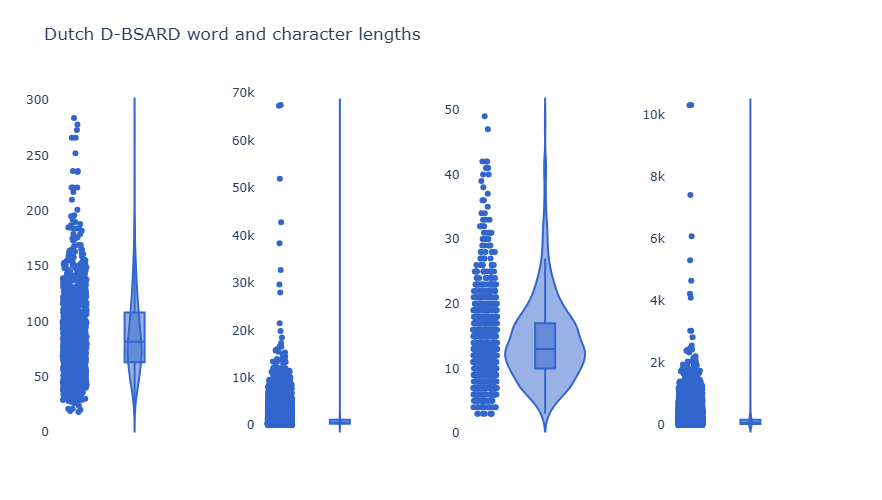

In [189]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

np.random.seed(0)  # For reproducibility
question_lengths = du_question_lengths
article_lengths = du_article_lengths
relevant_articles = du_question_word
citations = du_article_word

# Create subplots
fig = make_subplots(rows=1, cols=4, shared_xaxes=False, subplot_titles=[
    "", "", "", ""
])

# Define data and labels for each plot
data_series = [question_lengths, article_lengths, relevant_articles, citations]
labels = ['Number of words', 'Number of words', 'Number of articles', 'Number of citations']

# Plot each series
for i, (data, label) in enumerate(zip(data_series, labels), start=1):
    # Create violin plot for the current series
    violin_plot = px.violin(y=data,
                           box=True,
                           points="all",
                           labels={'y': label},
                           color_discrete_sequence=px.colors.qualitative.G10,
                           width=400, height=500)
    
    # Extract the trace from the plot
    trace = violin_plot.data[0]
    
    # Calculate statistics for annotation
    median = data.median()
    max_val = data.max()
    min_val = data.min()
    
    # Add the trace to the subplot
    fig.add_trace(trace, row=1, col=i)
    
# Update layout
fig.update_layout(
    title_text="Dutch D-BSARD word and character lengths",
    showlegend=False,
    height=500,
    width=1000,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the figure
fig.show()


In [193]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

question_lengths = fr_question_lengths
article_lengths = fr_article_lengths
relevant_articles = fr_question_word
citations = fr_article_word

# Create subplots
fig = make_subplots(rows=1, cols=4, shared_xaxes=False, subplot_titles=[
    "", "", "", ""
])

# Define data and labels for each plot
data_series = [question_lengths, article_lengths, relevant_articles, citations]
labels = ['Number of words', 'Number of words', 'Number of articles', 'Number of citations']

# Plot each series
for i, (data, label) in enumerate(zip(data_series, labels), start=1):
    # Create violin plot for the current series
    violin_plot = px.violin(y=data,
                           box=True,
                           points="all",
                           labels={'y': label},
                           color_discrete_sequence=px.colors.qualitative.G10,
                           width=400, height=500)
    
    # Extract the trace from the plot
    trace = violin_plot.data[0]
    
    # Calculate statistics for annotation
    median = data.median()
    max_val = data.max()
    min_val = data.min()
    
    # Add the trace to the subplot
    fig.add_trace(trace, row=1, col=i)
    
# Update layout
fig.update_layout(
    title_text="French D-BSARD word and character lengths",
    showlegend=False,
    height=500,
    width=1000,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the figure
fig.show()


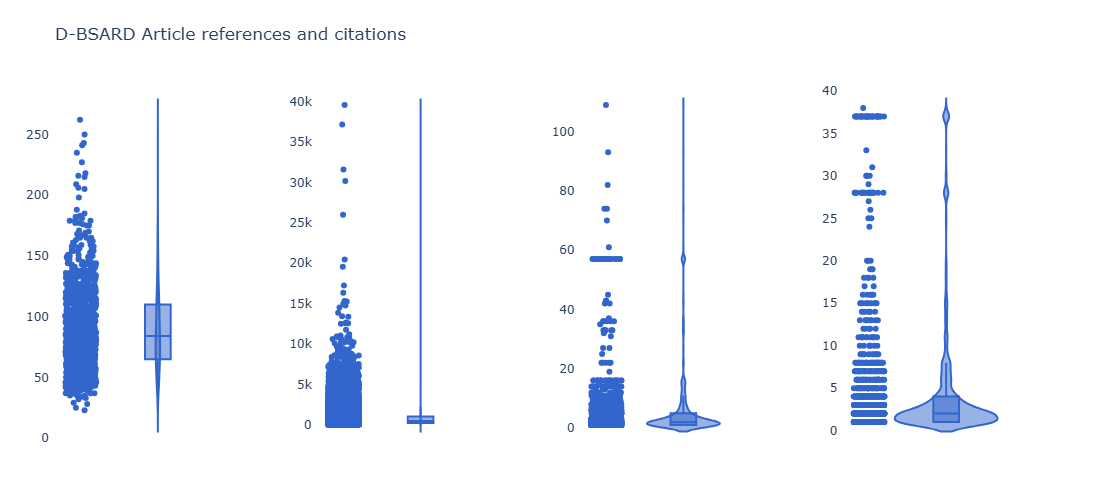

In [197]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

question_lengths = fr_question_lengths
article_lengths = fr_article_lengths
relevant_articles = article_references
citations = article_citations

# Create subplots
fig = make_subplots(rows=1, cols=4, shared_xaxes=False, subplot_titles=[
    "", "", "", ""
])

# Define data and labels for each plot
data_series = [question_lengths, article_lengths, relevant_articles, citations]
labels = ['Number of words', 'Number of words', 'Number of articles', 'Number of citations']

# Plot each series
for i, (data, label) in enumerate(zip(data_series, labels), start=1):
    # Create violin plot for the current series
    violin_plot = px.violin(y=data,
                           box=True,
                           points="all",
                           labels={'y': label},
                           color_discrete_sequence=px.colors.qualitative.G10,
                           width=400, height=500)
    
    # Extract the trace from the plot
    trace = violin_plot.data[0]
    
    # Calculate statistics for annotation
    median = data.median()
    max_val = data.max()
    min_val = data.min()
    
    # Add the trace to the subplot
    fig.add_trace(trace, row=1, col=i)
    
# Update layout
fig.update_layout(
    title_text="D-BSARD Article references and citations",
    showlegend=False,
    height=500,
    width=1000,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the figure
fig.show()


In [200]:
article_citations.value_counts()

1     437
2     396
3     172
4      92
6      42
8      37
7      34
5      34
37     32
28     24
11     13
9      11
15     10
13      8
14      7
10      7
12      5
16      5
18      4
30      4
19      3
20      3
17      2
25      2
24      1
26      1
27      1
29      1
31      1
33      1
38      1
dtype: int64

## Translate questions


In [56]:
len(df_q_synth)

113165

In [67]:
#Synthetic questions zijn te groot voor deepl, opsplitsen in delen van max 15000 rijen
# df_q_synth.iloc[105000:].to_csv("../../deepl/french/questions_synth_filtered_8.csv", index=False)


De vragen zijn vertaald met behulp van DeepL.

In [134]:
df_train_du = pd.read_csv('../../deepl/train_du.csv')
df_test_du = pd.read_csv('../../deepl/test_du.csv')
df_du = df_train_du.append(df_test_du, ignore_index=True)
#Something went wrong with the article_ids during translation
df_du['article_ids'] = df_q['article_ids']
df_du = df_du.drop("artikel_id's", axis=1)
len(df_train_du), len(df_test_du), len(df_du)

(886, 222, 1108)

In [ ]:
#The word 'Argent' is translated incorrectly
du_questions['category'] = du_questions['category'].replace('Zilver', 'Geld')

In [135]:
df_du_synth = pd.DataFrame()
for i in range(1, 9):
    new_df = pd.read_csv('../../deepl/synth_' + str(i) + '_nl.csv')
    df_du_synth = df_du_synth.append(new_df, ignore_index=True)
len(df_du_synth)

113165

In [136]:
df_du.columns = ['id', 'category', 'subcategory', 'question', 'extra_description', 'article_ids']
df_du_filtered = df_du[df_du['id'].isin(df_q_remaining['id'])]

len(df_du_filtered)

1048

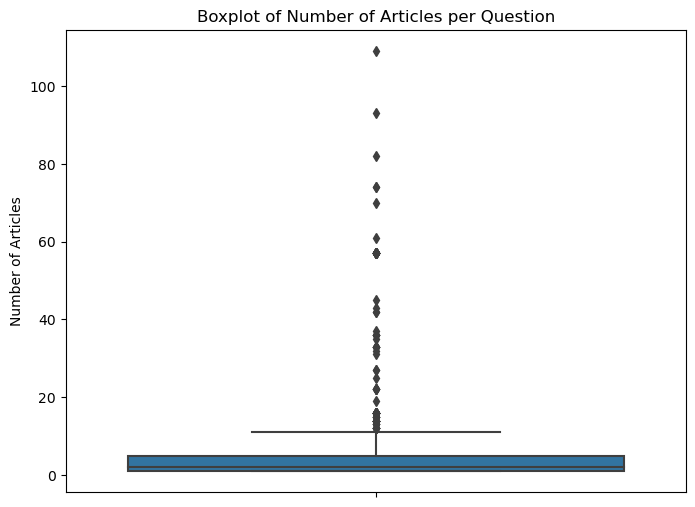

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'questions' is your DataFrame
# Convert the 'article_ids' column to a list of integers
df_du_filtered['article_ids_int'] = df_du_filtered['article_ids'].str.split(',').apply(lambda x: [int(id) for id in x])

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='nr_articles', data=df_du_filtered)

plt.title('Boxplot of Number of Articles per Question')
plt.ylabel('Number of Articles')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_data'

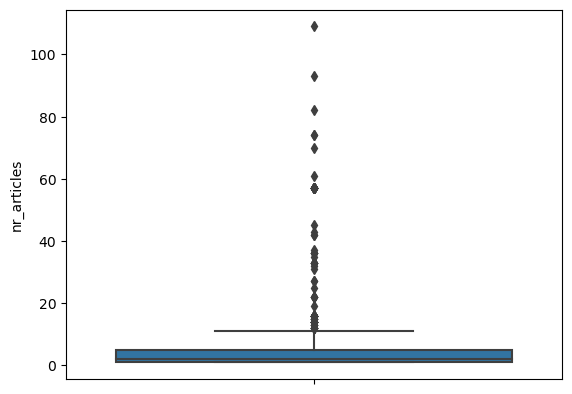

In [237]:
df_du_filtered['nr_articles'].describe()
boxplot_info = sns.boxplot(y='nr_articles', data=df_du_filtered)

# Extract the number of outliers
outlier_numbers = len(boxplot_info.get_data()['fliers'][0])

In [239]:
Q1 = df_du_filtered['nr_articles'].quantile(0.25)
Q3 = df_du_filtered['nr_articles'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
num_outliers = ((df_du_filtered['nr_articles'] < lower_bound) | (df_du_filtered['nr_articles'] > upper_bound)).sum()

# Print the number of outliers
print("Number of outliers:", num_outliers)
print(upper_bound)

Number of outliers: 118
11.0


In [241]:
len(df_du_filtered[df_du_filtered['nr_articles'].apply(lambda x: x>20)])

61

## Questions per article

In [269]:
french_ids = set(df_du_with_ids['french_id'].tolist())
big_list_set = set(big_list)
len(big_list), len(french_ids), len(big_list_set), len(french_ids-big_list_set)

(6330, 20877, 1391, 19486)

In [271]:
zeros_series = pd.Series([0]*19486)
ser_nr_questions_zero = pd.concat([ser_nr_questions_per_article, zeros_series],ignore_index=True)

In [272]:
len(ser_nr_questions_per_article)
len(ser_nr_questions_zero)

20877

In [294]:
ser_nr_questions_per_article.describe()

count    1391.000000
mean        4.550683
std         7.132668
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        38.000000
Name: article_ids_int, dtype: float64

In [255]:
# ser_nr_questions_per_article = df_du_filtered.explode("article_ids_int")["article_ids_int"].value_counts()

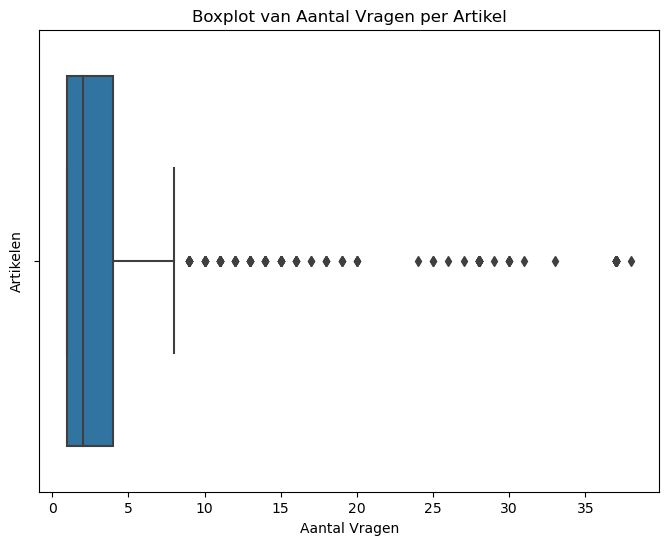

In [292]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=ser_nr_questions_per_article.values)
plt.title('Boxplot van Aantal Vragen per Artikel')
plt.xlabel('Aantal Vragen')
plt.ylabel('Artikelen')
plt.show()

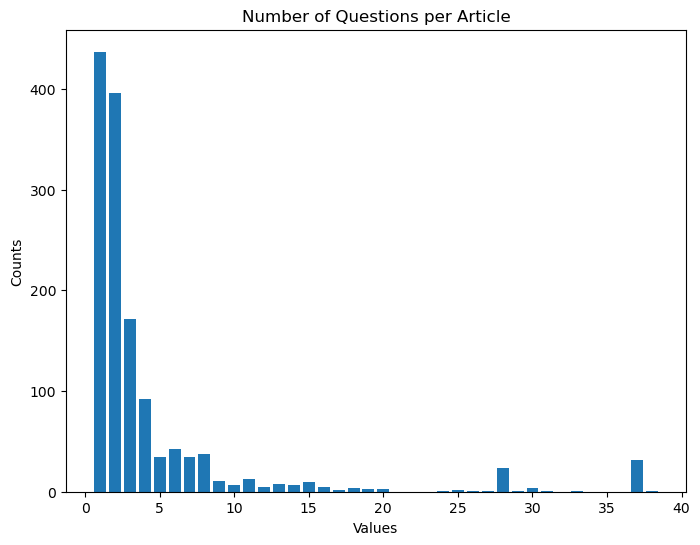

In [293]:
plt.figure(figsize=(8, 6))
plt.bar(ser_nr_questions_per_article.value_counts().index, ser_nr_questions_per_article.value_counts().values)# plt.title('Bar Chart of Value Counts')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.title('Number of Questions per Article')
plt.show()

In [137]:
##Shorten synthetic questions to only the relevant questions to the available article id's
df_du_synth.columns = ['id', 'question', 'article_ids']
article_ids = list(df_du_with_ids['french_id'])
df_du_synth_filtered = df_du_synth[df_du_synth['article_ids'].astype(int).isin(article_ids)]
len(df_du_synth_filtered)

104380

In [138]:
df_du_filtered.to_csv('../../translated_and_filtered/du_questions.csv', index=False)
df_du_synth_filtered.to_csv('../../translated_and_filtered/du_synth_questions.csv', index=False)